<a href="https://colab.research.google.com/github/amelliaaas/PraktikumML_282-305/blob/main/TugasPraktikum3%20update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **1. Load Dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
%cd /content/drive/MyDrive/Covid_data

/content/drive/MyDrive/Covid_data


In [2]:
# Define kaggle json path
# Sesuaikan dengan path anda
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Covid_data"

In [4]:
!ls

best_model.h5  Covid19-dataset	dataset  kaggle.json


In [5]:
!kaggle datasets download -d pranavraikokte/covid19-image-dataset

 99% 156M/158M [00:01<00:00, 104MB/s] 
100% 158M/158M [00:01<00:00, 106MB/s]


In [6]:
!ls

covid19-image-dataset.zip  kaggle.json


In [7]:
!unzip \*.zip &> /dev/null && rm *.zip

In [8]:
!ls

Covid19-dataset  kaggle.json


In [9]:
!mkdir dataset

In [3]:
import os
base_dir = 'Covid19-dataset'

train_dir = os.path.join(base_dir, 'test')
test_dir = os.path.join(base_dir, 'train')

train_covid_dir = os.path.join(train_dir, 'Covid')
train_normal_dir = os.path.join(train_dir, 'Normal')
train_pneumonia_dir = os.path.join(train_dir, 'Viral Pneumonia')

test_covid_dir = os.path.join(test_dir, 'Covid')
test_normal_dir = os.path.join(test_dir, 'Normal')
test_pneumonia_dir = os.path.join(test_dir, 'Viral Pneumonia')


In [11]:
ls

Covid19-dataset/  dataset/  kaggle.json


In [12]:
test_covid_dir

'Covid19-dataset/train/Covid'

In [13]:
!cd -

/


In [14]:
ls

Covid19-dataset/  dataset/  kaggle.json


In [4]:
#moving all dataset to training
import shutil

dataset1= os.listdir(test_covid_dir)
for file in dataset1:
  new_path = shutil.move(f"{test_covid_dir}/{file}",train_covid_dir)

dataset2= os.listdir(test_normal_dir)
for file in dataset2:
  new_path = shutil.move(f"{test_normal_dir}/{file}",train_normal_dir)

dataset3= os.listdir(test_pneumonia_dir)
for file in dataset3:
  new_path = shutil.move(f"{test_pneumonia_dir}/{file}",train_pneumonia_dir)



In [27]:
!ls dataset

**2. Spliting Data**

In [5]:
pip install split-folders

In [6]:
import splitfolders
splitfolders.ratio(train_dir, output="Covid19-dataset/datasets", seed=1337, ratio=(.7, .15, .15))

Copying files: 311 files [00:07, 41.98 files/s]


**3. Prerocessing**

In [7]:
# Definisikan path untuk data train test dan validation
# sesuaikan dengan path anda
import os
base_dir = 'Covid19-dataset/datasets'
train_path = os.path.join(base_dir, 'train')
test_path  = os.path.join(base_dir, 'test')
val_path   = os.path.join(base_dir, 'val')

In [8]:
# TULIS KODE ANDA DISINI

from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle

batch_size = 32
augmen_gen = ImageDataGenerator(rescale=1. / 255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')

train_gen = augmen_gen.flow_from_directory(
    train_path,
    class_mode = 'categorical',
    shuffle=True,
    target_size = (224,224),
    batch_size=batch_size,
    color_mode ='rgb'
)

val_gen = augmen_gen.flow_from_directory(
    val_path,
    class_mode = 'categorical',
    shuffle=True,
    target_size = (224,224),
    batch_size= batch_size,
    color_mode ='rgb'
)

test_gen = augmen_gen.flow_from_directory(
    test_path,
    class_mode = 'categorical',
    shuffle=False,
    target_size = (224,224),
    batch_size=batch_size,
    color_mode ='rgb',
)

Found 215 images belonging to 3 classes.
Found 45 images belonging to 3 classes.
Found 51 images belonging to 3 classes.


In [9]:
# IMPORT SEMUA PAKET YANG ANDA PERLUKAN UNTUK MENDEFINISIKAN MODEL DISINI

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
import time

In [10]:
# DEFINISIKAN MODEL ANDA DISINI

#Feature Selection
model = Sequential()

model.add(InputLayer(input_shape=[224,224,3]))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Flatten())

#Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))


In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [12]:
# TULIS CODE CALLBACKS ANDA DISINI

best_model_path = 'best_model.h5'
checkpoint_callback = ModelCheckpoint(best_model_path,
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)
reduce_callback = ReduceLROnPlateau(monitor='val_accuracy', patience=3, factor=0.5, min_lr=0.0003, verbose=1)
callbacks_list = [checkpoint_callback, reduce_callback]

In [16]:
# TULIS CODE UNTUK DEFINISI LEARNING RATE DISINI 

learning_rate = 0.001

In [17]:
# TULIS CODE UNTUK TRAINING DISINI

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=learning_rate),
              metrics='accuracy')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [18]:
# TULIS CODE UNTUK MENCETAK LAMA TRAINING TIME DISINI

start = time.time()
H = model.fit_generator(train_gen, epochs=100,validation_data=val_gen, verbose=1, callbacks=[callbacks_list])

End = time.time()
print ("training time: ", End-start,"s")  # the time would be round to 3 decimal in seconds

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 2.9076 - accuracy: 0.5860
Epoch 00001: val_accuracy did not improve from 0.31111
7/7 [==============================] - 42s 6s/step - loss: 2.9076 - accuracy: 0.5860 - val_loss: 1.1593 - val_accuracy: 0.2889 - lr: 0.0010
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 0.8959 - accuracy: 0.6930
Epoch 00002: val_accuracy improved from 0.31111 to 0.55556, saving model to best_model.h5
7/7 [==============================] - 44s 6s/step - loss: 0.8959 - accuracy: 0.6930 - val_loss: 0.9509 - val_accuracy: 0.5556 - lr: 0.0010
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 0.8467 - accuracy: 0.6977
Epoch 00003: val_accuracy improved from 0.55556 to 0.57778, saving model to best_model.h5
7/7 [==============================] - 45s 6s/step - loss: 0.8467 - accuracy: 0.6977 - val_loss: 0.9228 - val_accuracy: 0.5778 - lr: 0.0010
Epoch 4/100
7/7 [==============================] - ETA: 0s - loss:

In [22]:
# IMPORT SEMUA PAKET YANG ANDA PERLUKAN UNTUK MENGEVALUASI MODEL DISINI

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files

In [23]:
# TULIS CODE UNTUK EVALUASI MODEL DISINI

# model.load_weights(best_model_path)

ypred = model.predict(test_gen)
prediction = np.argmax(ypred, axis=1)
print(classification_report(test_gen.classes, prediction))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71        21
           1       1.00      0.07      0.12        15
           2       0.92      0.73      0.81        15

    accuracy                           0.65        51
   macro avg       0.82      0.60      0.55        51
weighted avg       0.79      0.65      0.57        51



Confusion matrix, without normalization
[[21  0  0]
 [13  1  1]
 [ 4  0 11]]


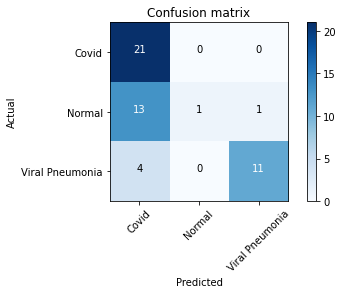

In [24]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

cnf_matrix=confusion_matrix(test_gen.classes,prediction)
plot_confusion_matrix(cnf_matrix, classes=test_gen.class_indices)

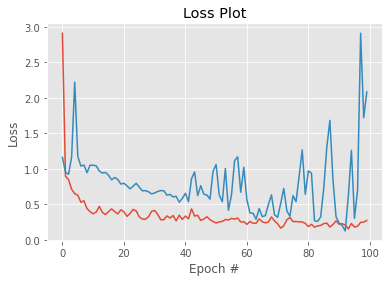

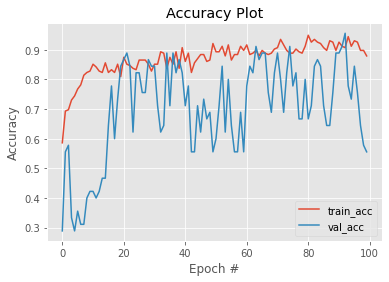

In [25]:
# TULIS CODE UNTUK PLOT EVALUASI MODEL DISINI

plt.style.use("ggplot")

plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.show()